In [30]:
import matplotlib.pyplot as plt
%matplotlib inline 
from skimage import data, filters
from skimage.io  import imread,  imshow, show
import numpy as np


import  src.opencvTools as gi

In [50]:
path = "images"
file = "2a12a01e11de3a6ec09710e5fe4eb0b7.jpg"

In [51]:
# file='coins.png'
#image = data.coins()

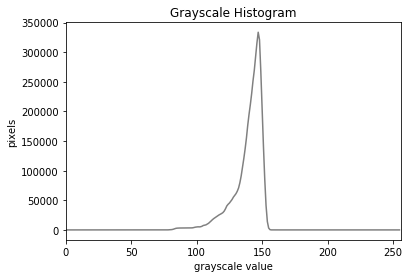

In [52]:
gi.getHisGrayScale(path + '/'+ file)

In [180]:
image = imread(path + '/'+ file , as_gray=True)


In [181]:
# usando el 10% del paper de Gajedran da como el orto
# threshold_global_otsu = threshold_otsu(image)
# tenPerc = (threshold_global_otsu  * 10) /100

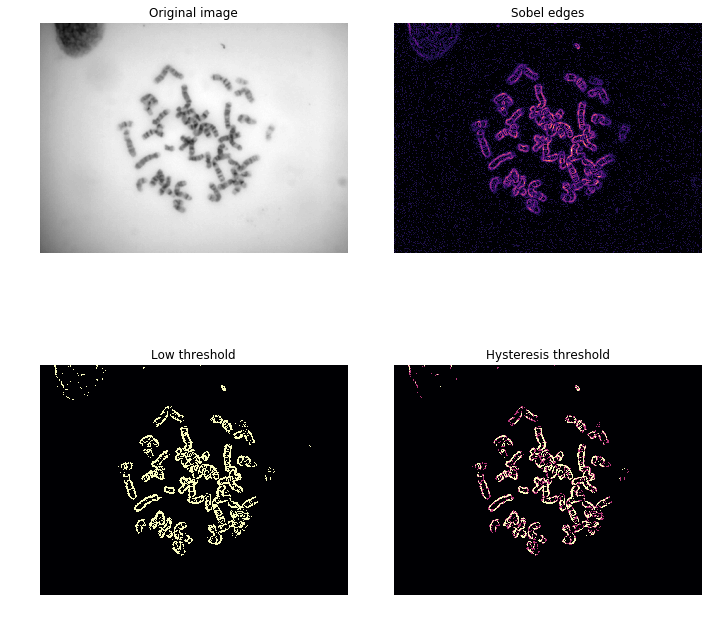

In [183]:
image = median(image, disk(5))
edges = filters.sobel(image)


low = 0.005
high= 0.0075

lowt = (edges > low).astype(int)
hight = (edges > high).astype(int)
hyst = filters.apply_hysteresis_threshold(edges, low, high)


fig, ax = plt.subplots(nrows=2, ncols=2,  figsize=(10, 10))
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(edges, cmap='magma')
ax[0, 1].set_title('Sobel edges')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')
ax[1, 1].imshow(hight + hyst, cmap='magma')
ax[1, 1].set_title('Hysteresis threshold')


for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

In [221]:
image = hight + hyst
image_binary = median(image_binary, disk(3))

In [222]:
image_binary = image < 0.5

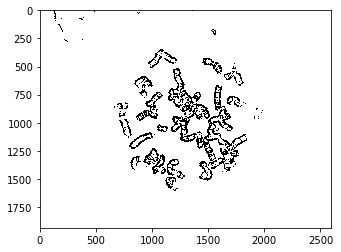

In [223]:
plt.imshow(image_binary )

In [224]:
from skimage import io, color, morphology
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

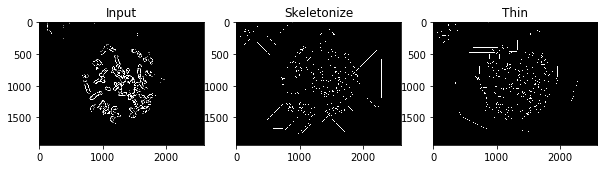

In [225]:
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 3))
ax0.imshow(image, cmap='gray')
ax0.set_title('Input')
ax1.imshow(out_skeletonize, cmap='gray')
ax1.set_title('Skeletonize')
ax2.imshow(out_thin, cmap='gray')
ax2.set_title('Thin')

plt.savefig('/tmp/char_out.png')
plt.show()

### Thresholdibng


Histogram-based. The histogram of the pixels’ intensity is used and certain assumptions are made on the properties of this histogram (e.g. bimodal).
Local. To process a pixel, only the neighboring pixels are used. These algorithms often require more computation time.



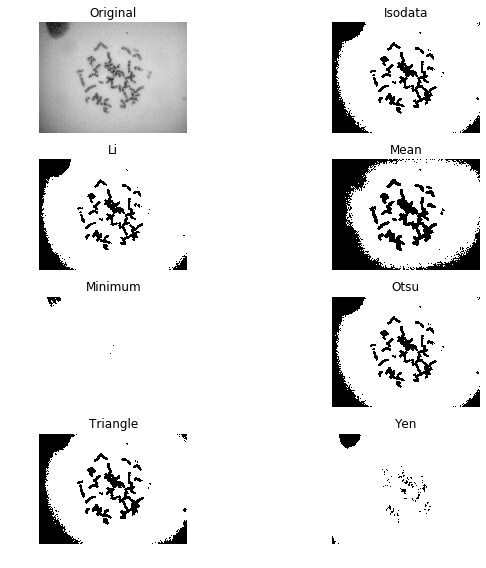

In [64]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import try_all_threshold

img = imread(path + '/'+ file , as_gray=True)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

### mean threshold

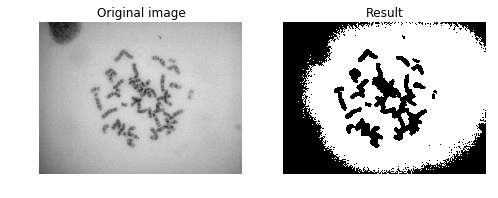

In [67]:
from skimage.filters import threshold_mean

thresh = threshold_mean(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')

plt.show()

### Bimodal histogram
For pictures with a bimodal histogram, more specific algorithms can be used. For instance, the minimum algorithm takes a histogram of the image and smooths it repeatedly until there are only two peaks in the histogram.


In [69]:
from skimage.filters import threshold_minimum


thresh_min = threshold_minimum(image)
binary_min = image > thresh_min

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(image.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary_min, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(image.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()


### Global thresholding

### Otsu’s method [2] 
calculates an “optimal” threshold (marked by a red line in the histogram below) by maximizing the variance between two classes of pixels, which are separated by the threshold. Equivalently, this threshold minimizes the intra-class variance.

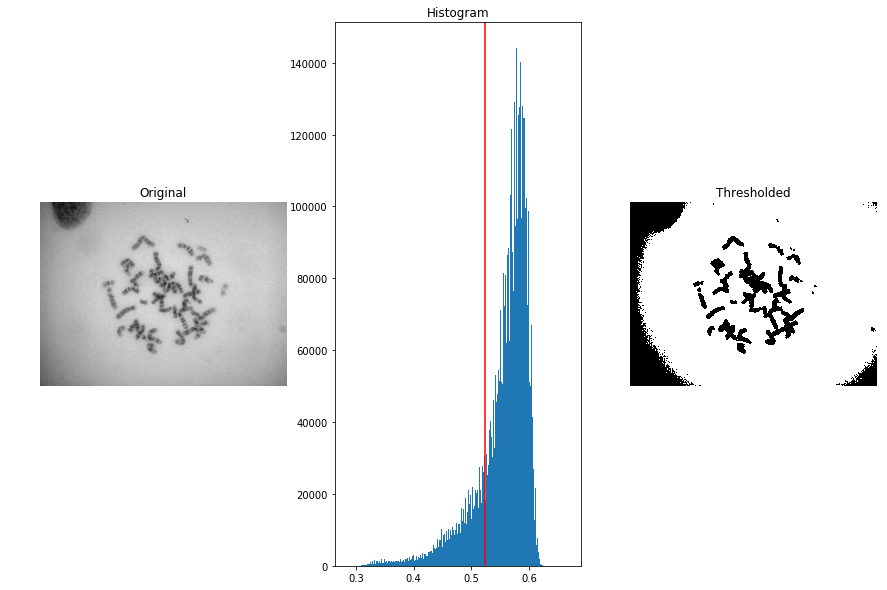

In [73]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(15, 10))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

### Local thresholding

If the image background is relatively uniform, then you can use a global threshold value as presented above. However, if there is large variation in the background intensity, adaptive thresholding (a.k.a. local or dynamic thresholding) may produce better results. Note that local is much slower than global thresholding.

Here, we binarize an image using the threshold_local function, which calculates thresholds in regions with a characteristic size block_size surrounding each pixel (i.e. local neighborhoods). Each threshold value is the weighted mean of the local neighborhood minus an offset value.


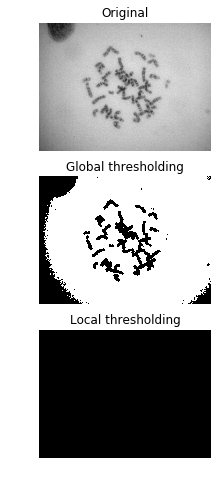

In [101]:
from skimage.filters import threshold_otsu, threshold_local


global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 35
local_thresh = threshold_local(image, block_size, offset=10)
binary_local = image > local_thresh

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

ax[2].imshow(binary_local)
ax[2].set_title('Local thresholding')

for a in ax:
    a.axis('off')

plt.show()

Now, we show how Otsu’s threshold [2] method can be applied locally. For each pixel, an “optimal” threshold is determined by maximizing the variance between two classes of pixels of the local neighborhood defined by a structuring element.

The example compares the local threshold with the global threshold.

/opt/miniconda3/envs/ImaProc/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(-0.5, 2591.5, 1935.5, -0.5)

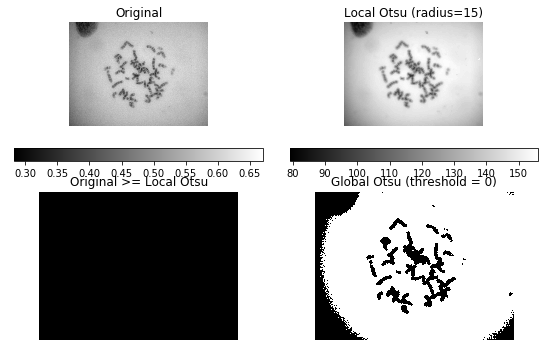

In [102]:
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte


img = image

radius = 15
selem = disk(radius)

local_otsu = rank.otsu(img, selem)
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu

fig, axes = plt.subplots(2, 2, figsize=(8, 5), sharex=True, sharey=True)
ax = axes.ravel()
plt.tight_layout()

fig.colorbar(ax[0].imshow(img, cmap=plt.cm.gray),
             ax=ax[0], orientation='horizontal')
ax[0].set_title('Original')
ax[0].axis('off')

fig.colorbar(ax[1].imshow(local_otsu, cmap=plt.cm.gray),
             ax=ax[1], orientation='horizontal')
ax[1].set_title('Local Otsu (radius=%d)' % radius)
ax[1].axis('off')

ax[2].imshow(img >= local_otsu, cmap=plt.cm.gray)
ax[2].set_title('Original >= Local Otsu' % threshold_global_otsu)
ax[2].axis('off')

ax[3].imshow(global_otsu, cmap=plt.cm.gray)
ax[3].set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax[3].axis('off')
